# Creating a Filter, Edge Detection

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# change working directory
%cd drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_2_Convolutional_Filters_Edge_Detection

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_2_Convolutional_Filters_Edge_Detection


### Import resources and display image

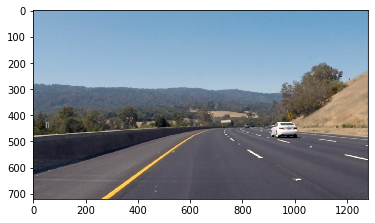

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image);

### Convert the image to grayscale

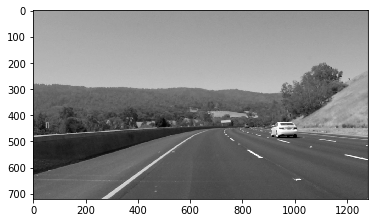

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray');

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

$$ S_x = \begin{pmatrix} -1 & 0 & 1 \\
                        -2 & 0 & 2 \\
                        -1 & 0 & 1 \\
        \end{pmatrix} $$

$$ S_y = \begin{pmatrix} -1 & -2 & -1 \\
                         0 &  0 & 0 \\
                         1 &  2 & 1 \\
        \end{pmatrix} $$

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

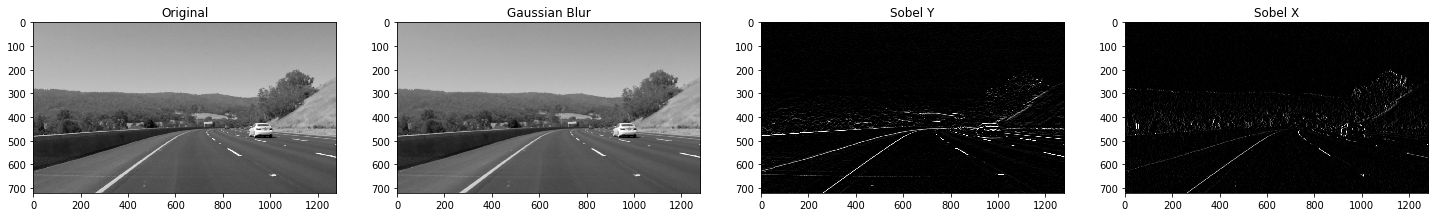

In [4]:
# Create a custom kernel
blur = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]]) / 16

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
filtered_image_blur = cv2.filter2D(gray, -1, blur)

f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(25,15))

ax0.imshow(gray, cmap = 'gray')
ax0.set_title('Original')

ax1.imshow(filtered_image_blur, cmap = 'gray')
ax1.set_title('Gaussian Blur')

ax2.imshow(filtered_image_y, cmap = 'gray')
ax2.set_title('Sobel Y')

ax3.imshow(filtered_image_x, cmap = 'gray')
ax3.set_title('Sobel X');

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.

